# PREDICTION USING UNSUPERVISED ML

IN THE TASK PROVIDED, WE NEED TO PREDICT THE OPTIMUM NUMBER OF CLUSTERS AND REPRESENT IT VISUALLY FROM 'IRIS' DATASET.


Language: Python

IDE: Jupyter Notebook

# AUTHOR: ADITYA JAMWAL

TASK-2

In [1]:
# Importing the libraries required to carry out the task

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Importing downloaded dataset file

data=pd.read_csv("Iris.csv")

In [3]:
# Knowing About Dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
# Data Exploration

data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
# Removing column which wouldn't affect the dataset in order to minimise preprocessing further ('ID')

data.drop(['Id'], axis = 1, inplace = True) 

In [6]:
# Checking the shape to confirm removal of 'ID'

data.shape

(150, 5)

In [7]:
# Descriptive Statistics 

data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# Extracting only the numerical data and printing it

x=data.iloc[:,[0, 1, 2, 3]].values
print(x)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [9]:
# Normalizing the extracted numerical datatype from set

from sklearn.preprocessing import Normalizer
norm=Normalizer()
columns=data.columns
data=norm.fit_transform(x)

In [10]:
# Selecting Random Value of Clusters as centroids 

from sklearn.cluster import KMeans
SSE=[]
kmeans=KMeans(n_clusters=2)
kmeans.fit(data)
pred1=kmeans.predict(data)

In [11]:
# Printing Details based on K=2

pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [12]:
# Implementing KMeans to find the right number of clusters

for cluster in range(1,10):
    kmeans = KMeans(n_clusters=cluster, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    SSE.append(kmeans.inertia_)

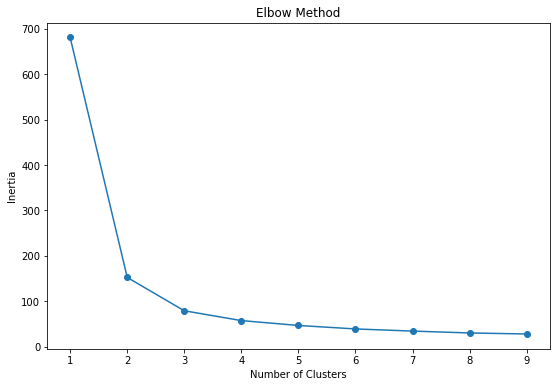

In [13]:
# Cluster Plot Visualization (Elbow Method)

frame=pd.DataFrame({'cluster':range(1,10),'SSE':SSE})
plt.figure(figsize=(9,6))
plt.plot(frame['cluster'],frame['SSE'],marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel("Inertia")
plt.show()

In [14]:
# Acknowledging the Level-Off from K=3 from skimming plot above

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 400, n_init = 10, random_state = 42)
pred = kmeans.fit_predict(x)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

# CLUSTER MODELS

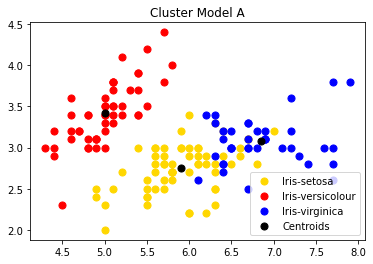

In [15]:
# ClusterPlot-A (0,1)

plt.scatter(x[pred==0,0], x[pred==0,1], s = 50, c = 'gold', label = 'Iris-setosa')
plt.scatter(x[pred==1,0], x[pred==1,1], s = 50, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[pred==2,0], x[pred==2, 1],s = 50, c = 'blue', label = 'Iris-virginica')

# Centroid-A

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'black', label = 'Centroids')
plt.title("Cluster Model A")
plt.legend()
plt.show()

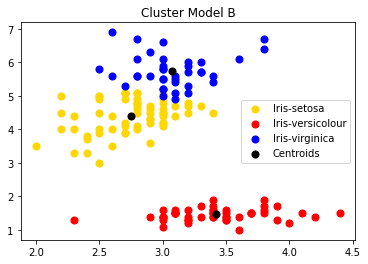

In [16]:
# ClusterPlot-B (1,2)

plt.scatter(x[pred==0,1], x[pred==0,2], s = 50, c = 'gold', label = 'Iris-setosa')
plt.scatter(x[pred==1,1], x[pred==1,2], s = 50, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[pred==2,1], x[pred==2, 2], s = 50, c = 'blue', label = 'Iris-virginica')

# Centroid-B

plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:,2], s = 50, c = 'black', label = 'Centroids')
plt.title("Cluster Model B")
plt.legend()
plt.show()

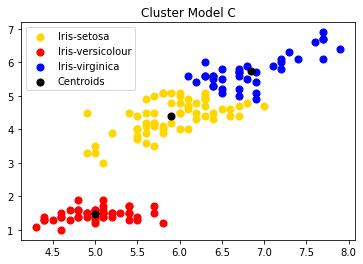

In [17]:
# ClusterPlot-C (0,2)

plt.scatter(x[pred==0,0], x[pred==0,2], s = 50, c = 'gold', label = 'Iris-setosa')
plt.scatter(x[pred==1,0], x[pred==1,2], s = 50, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[pred==2,0], x[pred==2, 2], s = 50, c = 'blue', label = 'Iris-virginica')

# Centroid-C

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,2], s = 50, c = 'black', label = 'Centroids')
plt.title("Cluster Model C")
plt.legend()
plt.show()

In [18]:
# Classification Report to Check Model Accuracy

from sklearn.metrics import classification_report
print(classification_report(pred1,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      50.0
           1       0.00      0.00      0.00     100.0
           2       0.00      0.00      0.00       0.0

    accuracy                           0.00     150.0
   macro avg       0.00      0.00      0.00     150.0
weighted avg       0.00      0.00      0.00     150.0



# Conclusion

The Weighted Avg Provides with Overall High Precision and Recall Score, supporting our cluster model.
The Model Plots also provides distinctive clusters for various species in 'Iris" Dataset.

# THANK YOU

-------------------------------------------------------------------------------------------------------------------------------